In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from os import listdir

%matplotlib notebook

In [2]:
# 3-Dimensional Data Array: (Distances, AWG Driving Voltage, Rx Voltage) Data Points
    # Array Position -> Data Point:
        # Distances              0 -> 5 mm,          1 -> 10 mm,         , ...
        # AWG Driving Voltages   0 -> 300 mV,        1 -> 400 mV,        , ...
        # Rx Voltage             0 -> V_Rx @ t=-100, 1 -> V_Rx @ t=-100+δ, ...

data_arr = np.empty((3, 18, 5004*32))
distances = np.sort(np.array(listdir("../measurements/csv")).astype(np.int))
i = 0
for distance in distances:
    awg_voltages = np.sort(np.array(listdir("../measurements/csv/" + str(distance))).astype(np.int))
    j = 0
    for awg_voltage in awg_voltages:
        measurements = np.array(listdir("../measurements/csv/" + 
                                               str(distance) + "/" + 
                                               str(awg_voltage)))
        k = 0
        for measurement in measurements:
            csv_data = pd.read_csv("../measurements/csv/" + str(distance) +
                                   "/" + str(awg_voltage) + "/" + str(measurement), 
                                   names=["Time", "Rx Voltage (mV)"])
            csv_data = csv_data[2:].drop(["Time"], axis=1).reset_index(drop=True)
            csv_data = csv_data.astype("float64").to_numpy().flatten()
            data_arr[i][j][k*5004:(k+1)*5004] = csv_data
            k += 1
        j += 1
    i += 1

In [3]:
distances = np.empty(len(data_arr)*len(data_arr[0]))
awg_voltages = np.empty(len(data_arr)*len(data_arr[0]))
rx_voltages = np.empty(len(data_arr)*len(data_arr[0]))

data_point_index = 0
for i in range(len(data_arr)):
    for j in range(len(data_arr[i])):
        distances[data_point_index] = (i+1)*5
        awg_voltages[data_point_index] = (j+1)*100+200
        rx_voltages[data_point_index] = (data_arr[i][j].max()-data_arr[i][j].min())/2        
        data_point_index += 1

<IPython.core.display.Javascript object>


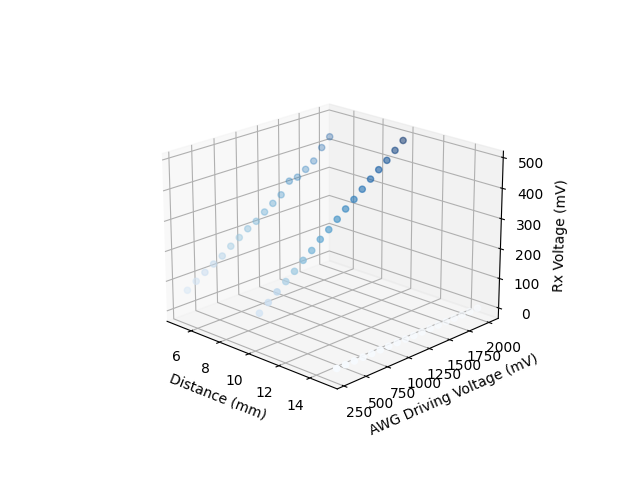

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Distance (mm)')
ax.set_ylabel('AWG Driving Voltage (mV)')
ax.set_zlabel('Rx Voltage (mV)')

ax.scatter3D(distances, awg_voltages, rx_voltages, c=rx_voltages, cmap='Blues');